Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset1...
Database contains 391 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset2...
Database contains 332 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset3...
Database contains 291 images


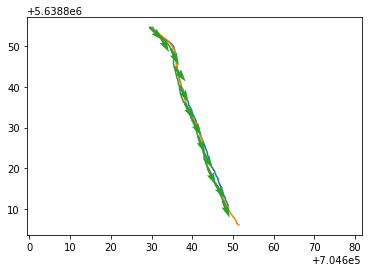

In [3]:
import sys
NAVBENCH_ROOT = '../..'
sys.path.append(NAVBENCH_ROOT)

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip
import numpy as np
import os


IM_SIZE = (90, 25)
PREPROC = (ip.resize(*IM_SIZE), ip.histeq)
# PREPROC = (ip.remove_sky_and_histeq, ip.resize(*IM_SIZE))
SNAP_STEP = 25
PROCESSES = None


DB_ROOT = os.path.join(NAVBENCH_ROOT, 'datasets/rc_car/Stanmer_park_dataset/2611')
dbs = [nb.Database('%s/unwrapped_dataset%d' % (DB_ROOT, i)) for i in range(1, 4)]

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')


heading_offset = dbs[0].calculate_heading_offset(0.25)
image_sets = [db.read_images(preprocess=PREPROC) for db in dbs]

snapshots = image_sets[0] + image_sets[1]
# snapshots = image_sets[0]

for db, test_images, colour in zip(dbs[2:], image_sets[2:], colours[2:]):
    test_images = test_images[::SNAP_STEP]

    headings = heading_offset + nb.get_ridf_headings(test_images, snapshots)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);

Using cached result from '.navbench_cache/ipython_get_trained_network_fafc83ddd5cf706e64c39f046858a89aee72d4f382d785c095b56b6e0a738f40.pkl'
get_trained_network() took 91.8442 s to run (without caching)
Starting get_infomax_headings()...
get_infomax_headings() took 11.6971 s to run (without caching)
Saving result to cache '.navbench_cache/ipython_get_infomax_headings_794edff02688d8a420861d9e9dce51f5b96c44375ab5b64c9e0f0c88e91d2464.pkl'


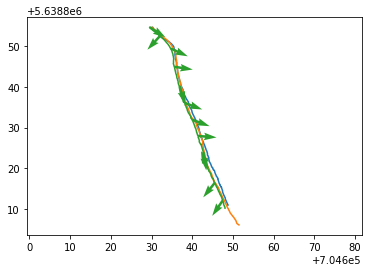

In [4]:
from navbench.infomax import *

training_images = snapshots

INFOMAX_SEED = 42
INFOMAX_LEARNING_RATE = InfoMax.DEFAULT_LEARNING_RATE
ann = get_trained_network(training_images, INFOMAX_SEED, learning_rate=INFOMAX_LEARNING_RATE)

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')

for db, test_images, colour in zip([dbs[2]], [image_sets[2]], [colours[2]]):
    test_images = test_images[::SNAP_STEP]

    headings = heading_offset + get_infomax_headings(ann, test_images, processes=PROCESSES)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);